In [1]:
import ringity as rng
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
from layout import Layout

In [2]:
FIBRO_FILE = "fibroblast proximity/connectivity_FLS11_data.xls"

name = "FLS18 TNF"

In [3]:
d = 115    # threshold

fibro_position_df = pd.read_excel(FIBRO_FILE, sheet_name=name)
D_fibro = squareform(pdist(fibro_position_df[['Position X','Position Y','Position Z']])) # distance matrix

G_fibro = nx.from_numpy_array(np.where(D_fibro > d,0,1))    # create (unweighted) network 
G_fibro = G_fibro.subgraph(max(nx.connected_components(G_fibro), key=len)).copy() # get lcc, in case threshold was chosen too low
    
pos = nx.spring_layout(G_fibro)

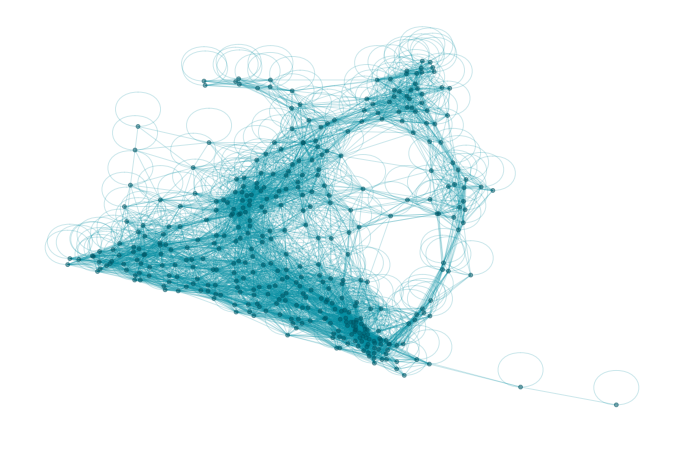

In [4]:
rng.plot_nx(G_fibro, pos=pos, node_alpha=0.5)

In [5]:
layout = Layout(G_fibro, pos)

In [6]:
layout.node_table

,x,y,z,r,g,b,a,name
0,0.054335,0.387927,0,31,119,180,100,node_0
1,0.122047,0.362978,0,31,119,180,100,node_1
2,0.306982,0.269829,0,31,119,180,100,node_2
3,0.123203,0.376266,0,31,119,180,100,node_3
4,0.613491,0.085767,0,31,119,180,100,node_4
...,...,...,...,...,...,...,...,...
398,0.175224,0.345242,0,31,119,180,100,node_398
399,0.130687,0.383335,0,31,119,180,100,node_399
400,0.470267,0.252588,0,31,119,180,100,node_400
401,0.547453,0.176080,0,31,119,180,100,node_401


In [7]:
layout.edge_table

,i,j,r,g,b,a
0,0,0,0,0,0,100
1,0,1,0,0,0,100
2,0,3,0,0,0,100
3,0,8,0,0,0,100
4,0,10,0,0,0,100
...,...,...,...,...,...,...
7264,398,399,0,0,0,100
7265,399,399,0,0,0,100
7266,400,400,0,0,0,100
7267,401,401,0,0,0,100
